In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")

In [4]:
df

MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]

In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [7]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
df.corr()

MODELYEAR  ENGINESIZE  CYLINDERS  \
MODELYEAR                       NaN         NaN        NaN   
ENGINESIZE                      NaN    1.000000   0.934011   
CYLINDERS                       NaN    0.934011   1.000000   
FUELCONSUMPTION_CITY            NaN    0.832225   0.796473   
FUELCONSUMPTION_HWY             NaN    0.778746   0.724594   
FUELCONSUMPTION_COMB            NaN    0.819482   0.776788   
FUELCONSUMPTION_COMB_MPG        NaN   -0.808554  -0.770430   
CO2EMISSIONS                    NaN    0.874154   0.849685   

                          FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
MODELYEAR                                  NaN                  NaN   
ENGINESIZE                            0.832225             0.778746   
CYLINDERS                             0.796473             0.724594   
FUELCONSUMPTION_CITY                  1.000000             0.965718   
FUELCONSUMPTION_HWY                   0.965718             1.000000   
FUELCONSUMPTION_COMB                  0.995542             0.985804   
FUELCONSUMPTION_COMB_MPG             -0.935613            -0.893809   
CO2EMISSIONS                          0.898039             0.861748   

                          FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
MODELYEAR                                  NaN                       NaN   
ENGINESIZE                            0.819482                 -0.808554   
CYLINDERS                             0.776788                 -0.770430   
FUELCONSUMPTION_CITY                  0.995542                 -0.935613   
FUELCONSUMPTION_HWY                   0.985804                 -0.893809   
FUELCONSUMPTION_COMB                  1.000000                 -0.927965   
FUELCONSUMPTION_COMB_MPG             -0.927965                  1.000000   
CO2EMISSIONS                          0.892129                 -0.906394   

                          CO2EMISSIONS  
MODELYEAR                          NaN  
ENGINESIZE                    0.874154  
CYLINDERS                     0.849685  
FUELCONSUMPTION_CITY          0.898039  
FUELCONSUMPTION_HWY           0.861748  
FUELCONSUMPTION_COMB          0.892129  
FUELCONSUMPTION_COMB_MPG     -0.906394  
CO2EMISSIONS                  1.000000

1. As we can clearly see that 'FUELCONSUMPTION_CITY' and  'FUELCONSUMPTION_HWY' have very strong correlation with 'FUELCONSUMPTION_COMB' we can drop them off.
2. 'MODELYEAR' has no correlation with any values so this column can also be dropped off.

In [10]:
features=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [11]:
features.isna().sum()

ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [12]:
features.shape

(1067, 5)

In [13]:
## Checking the duplicates present in the data
features.duplicated().sum()

509

In [14]:
## Removing the duplicates
features1=features.drop_duplicates()

In [15]:
features1.shape

(558, 5)

In [16]:
features1.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

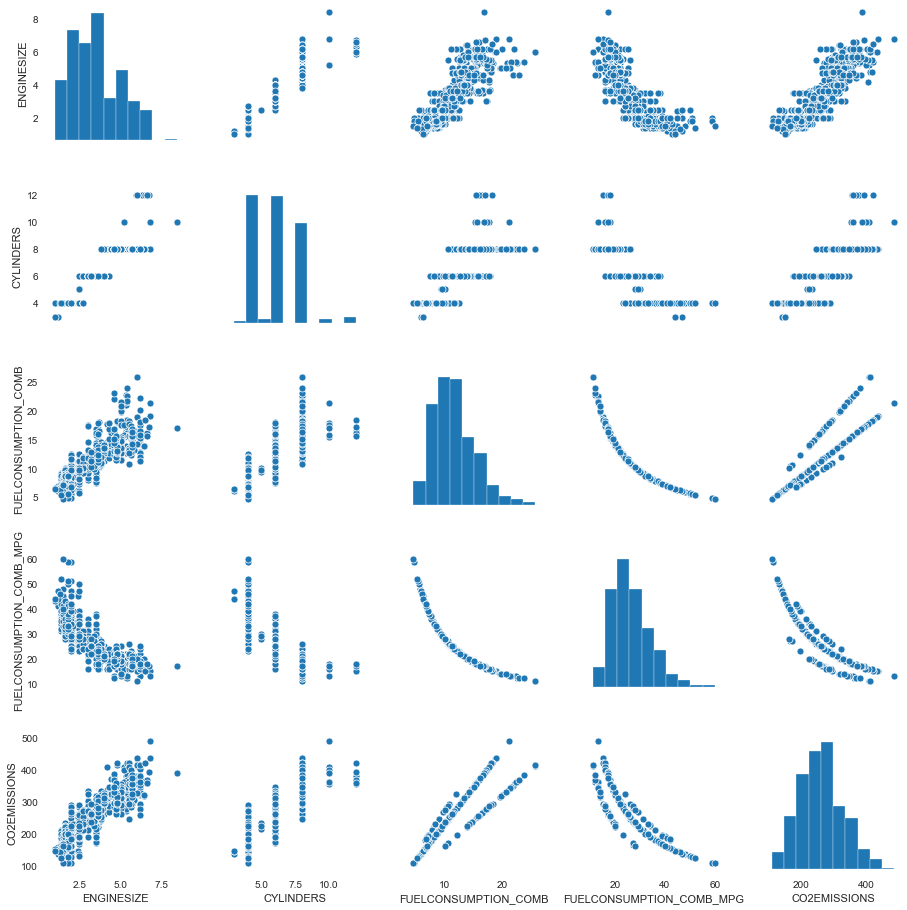

In [17]:
sns.pairplot(features1)

## Finding the outliers.

In [18]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print("Lower bound of this column is = ", lower_range)
    print("Upper bound of this column is = ", upper_range)
    
    print("The values are = ", datacolumn[(datacolumn < lower_range) | (datacolumn > upper_range)])    
    print("The % of outlier values are = ", len(datacolumn[(datacolumn < lower_range) | (datacolumn > upper_range)])/len(datacolumn)*100)    

In [19]:
outlier_treatment(features1.ENGINESIZE)

Lower bound of this column is =  -0.8999999999999999
Upper bound of this column is =  7.8999999999999995
The values are =  940    8.4
Name: ENGINESIZE, dtype: float64
The % of outlier values are =  0.17921146953405018


In [20]:
outlier_treatment(features1.CYLINDERS)

Lower bound of this column is =  -2.0
Upper bound of this column is =  14.0
The values are =  Series([], Name: CYLINDERS, dtype: int64)
The % of outlier values are =  0.0


In [21]:
outlier_treatment(features1.FUELCONSUMPTION_COMB)

Lower bound of this column is =  2.112499999999999
Upper bound of this column is =  20.8125
The values are =  182    22.1
212    20.9
214    21.5
218    22.6
225    25.7
228    25.8
344    21.9
346    22.5
348    23.0
349    21.2
351    23.9
362    21.6
642    21.4
Name: FUELCONSUMPTION_COMB, dtype: float64
The % of outlier values are =  2.3297491039426523


In [22]:
outlier_treatment(features1.FUELCONSUMPTION_COMB_MPG)

Lower bound of this column is =  3.5
Upper bound of this column is =  47.5
The values are =  2       48
415     51
487     59
655     50
970     50
987     59
988     60
989     51
1042    52
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64
The % of outlier values are =  1.6129032258064515


In [23]:
outlier_treatment(features1.CO2EMISSIONS)

Lower bound of this column is =  78.5
Upper bound of this column is =  434.5
The values are =  75     437
227    435
349    488
Name: CO2EMISSIONS, dtype: int64
The % of outlier values are =  0.5376344086021506


In [24]:
## Creating a new dataset for importing.

features2=features1.copy()

In [25]:
## Using z-scores to remove the outliers.

z_scores = stats.zscore(features1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
features2 = features1[filtered_entries]

In [26]:
features2.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

## Preparing the model. 

### Let us take the features without the outliers present in them.

In [54]:
### For training the model we need to first split our data as train and test data randomly. 

X=features2[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]]
y=features2["CO2EMISSIONS"]

In [55]:
### For training the model

from sklearn.model_selection import train_test_split

In [56]:
## Randoming selecting the data.

X_Train,X_Test,Y_Train, Y_Test = train_test_split(X, y, test_size=0.25)

In [57]:
## Importing the Linear Regression model
from sklearn.linear_model import LinearRegression

In [58]:
##Calling the model from sklearn
Model = LinearRegression()

In [59]:
## Fitting the data to the model
Model.fit(X_Train, Y_Train)

LinearRegression()

In [60]:
New_prediction = Model.predict(X_Test)

In [61]:
pd.DataFrame({"Actual_Data":Y_Test,
             "New_Predication":New_prediction,
             "Error":Y_Test-New_prediction}) 

Actual_Data  New_Predication      Error
365          274       270.094589   3.905411
298          301       316.507908 -15.507908
500          276       270.515998   5.484002
740          235       249.204264 -14.204264
372          317       291.827733  25.172267
..           ...              ...        ...
482          186       193.025862  -7.025862
163          262       265.572819  -3.572819
606          225       212.644418  12.355582
973          168       169.827008  -1.827008
318          195       247.415268 -52.415268

[134 rows x 3 columns]

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(Y_Test,New_prediction)

0.8517388313624521

In [65]:
## Total mean error
mean_squared_error(Y_Test, New_prediction)

543.2392347750119

In [66]:
## RMSE- Root mean squared error 
np.sqrt(mean_squared_error(Y_Test, New_prediction)) # RMSE is square root it Mean squared error

23.30749310361395

In [67]:
Train_Score = Model.score(X_Train, Y_Train)

In [68]:
print("Train Score of a Model is : {}".format(Train_Score))

Train Score of a Model is : 0.8710081074061065


In [69]:
Test_Score = Model.score(X_Test,Y_Test)
print("Test Score of a Model is : {}".format(Test_Score))

Test Score of a Model is : 0.8517388313624521


### Now let us take the features with the outliers present in it.

In [70]:
X1=features2[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]]
y1=features2["CO2EMISSIONS"]

In [71]:
X_Train1,X_Test1,Y_Train1, Y_Test1 = train_test_split(X1, y1, test_size=0.25)
Model1 = LinearRegression()
Model1.fit(X_Train1, Y_Train1)
New_prediction1 = Model1.predict(X_Test1)

In [72]:
pd.DataFrame({"Actual_Data":Y_Test1,
             "New_Predication":New_prediction1,
             }) 

Actual_Data  New_Predication
685           145       143.971349
289           222       292.227230
515           143       143.464283
1043          198       196.130800
132           370       326.470620
...           ...              ...
891           313       287.391561
181           377       348.006797
1015          200       200.349090
748           269       292.214094
56            285       270.301249

[134 rows x 2 columns]

In [73]:
r2_score(Y_Test1,New_prediction1)

0.8600612822920946

In [74]:
Train_Score1 = Model1.score(X_Train1, Y_Train1)
print("Train Score of a Model is : {}".format(Train_Score1))

Train Score of a Model is : 0.8684986047680322


In [75]:
Test_Score1 = Model1.score(X_Test1,Y_Test1)
print("Test Score of a Model is : {}".format(Test_Score1))

Test Score of a Model is : 0.8600612822920946


### Observations

1. We can see that before removing the outliers and after removing the outliers there isn't significant change in the prediction.
2. Hence the outliers can be kept for the prediction of the model.